# Pothole Classification

In this notebook we will try to analyze the data inorder to draw various insights from the data,which will help us in bringing a machine learning solution that will classify  whether the pothole is present or not.

<h3> Data Overview </h3>

In [1]:
#Importing various libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [22]:
sensor_data = pd.read_csv('Pothole_Data/trip5_sensors.csv')

In [32]:
sensor_data.head(10)

,timestamp,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ
0,1.493004e+09,40.447526,-79.944193,0.0,0.217667,-0.980042,0.158340,0.032960,0.048734,0.107899
1,1.493004e+09,40.447526,-79.944193,0.0,0.011353,-0.946930,0.212097,0.023599,-0.087376,0.017527
2,1.493004e+09,40.447526,-79.944193,0.0,0.023651,-0.956955,0.208115,-0.009587,0.005381,0.003087
3,1.493004e+09,40.447526,-79.944193,0.0,0.061081,-0.956085,0.201462,-0.014854,0.001160,-0.003354
4,1.493004e+09,40.447526,-79.944193,0.0,0.070160,-0.956467,0.194504,-0.012799,-0.000980,0.000938
5,1.493004e+09,40.447526,-79.944193,0.0,0.061966,-0.952271,0.196854,-0.012831,-0.005235,0.000948
6,1.493004e+09,40.447526,-79.944193,0.0,0.070007,-0.952316,0.196289,-0.011765,-0.003114,0.002020
7,1.493004e+09,40.447526,-79.944193,0.0,0.054047,-0.957733,0.198166,-0.011683,0.000076,-0.002252
8,1.493004e+09,40.447526,-79.944193,0.0,0.067413,-0.959885,0.198181,-0.012815,-0.003108,0.000943
9,1.493004e+09,40.447526,-79.944193,0.0,0.057480,-0.955154,0.197617,-0.013857,-0.002037,-0.000137


In [33]:
pothole_data = pd.read_csv('Pothole_Data/trip5_potholes.csv')

In [34]:
pothole_data

,timestamp
0,1.493004e+09
1,1.493004e+09
2,1.493004e+09
3,1.493004e+09
4,1.493004e+09
5,1.493004e+09
6,1.493004e+09
7,1.493004e+09
8,1.493004e+09
9,1.493004e+09


In [2]:
def isPothole(start,end,df_pothole):
    timestamp = df_pothole['timestamp']
    for time in timestamp:
        if start < time and time <= end:
            return True
    return False
    

    

In [3]:
def convert_to_interval(df_sensor,df_pothole):
    len_sensor = len(df_sensor)
    data = list()
    for k in range(0,len_sensor,10):
        current_interval = df_sensor[k:k+10]
        meanSpeed = current_interval['speed'].mean()
        sdSpeed = current_interval['speed'].std()
        maxAccelX = max(current_interval['accelerometerX'])
        maxAccelY = max(current_interval['accelerometerY'])
        maxAccelZ = max(current_interval['accelerometerZ'])
        maxGyroX = max(current_interval['gyroX'])
        maxGyroY = max(current_interval['gyroY'])
        maxGyroZ = max(current_interval['gyroZ'])
        minAccelX = min(current_interval['accelerometerX'])
        minAccelY = min(current_interval['accelerometerY'])
        minAccelZ = min(current_interval['accelerometerZ'])
        minGyroX = min(current_interval['gyroX'])
        minGyroY = min(current_interval['gyroY'])
        minGyroZ = min(current_interval['gyroZ'])
        meanAccelX = current_interval['accelerometerX'].mean()
        meanAccelY = current_interval['accelerometerY'].mean()
        meanAccelZ = current_interval['accelerometerZ'].mean()
        sdAccelX = current_interval['accelerometerX'].std()
        sdAccelY = current_interval['accelerometerY'].std()
        sdAccelZ = current_interval['accelerometerZ'].std()
        meanGyroX = current_interval['gyroX'].mean()
        meanGyroY = current_interval['gyroY'].mean()
        meanGyroZ = current_interval['gyroZ'].mean()
        sdGyroX = current_interval['gyroX'].std()
        sdGyroY = current_interval['gyroY'].std()
        sdGyroZ = current_interval['gyroZ'].std()
        pothole = isPothole(list(current_interval['timestamp'])[0],list(current_interval['timestamp'])[-1],df_pothole)
        datapoint = [meanSpeed, sdSpeed, maxAccelX, maxAccelY, maxAccelZ, maxGyroX, maxGyroY, 
                           maxGyroZ, minAccelX, minAccelY, minAccelZ, minGyroX, minGyroY, minGyroZ, 
                           meanAccelX, meanAccelY, meanAccelZ, meanGyroX, meanGyroY, meanGyroZ,
                           sdAccelX, sdAccelY, sdAccelZ, sdGyroX, sdGyroY, sdGyroZ, pothole]
        data.append(datapoint)
    df = pd.DataFrame.from_records(data)
    df.columns = ["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "pothole"]
    
    return df
    


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [4]:
df = pd.DataFrame(columns=["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "pothole"])
for i in range(1,6):
  
    df_sensor = pd.read_csv('Pothole_Data/'+"trip%s_sensors.csv" % i)
    df_pothole = pd.read_csv('Pothole_Data/'+"trip%s_potholes.csv" % i)
    trip_df = convert_to_interval(df_sensor,df_pothole)
    
    #print(trip_df.head(5))
    
    df = df.append(trip_df,ignore_index=True)
    
    
df.head(5)

    
    
    

,meanSpeed,sdSpeed,maxAccelX,maxAccelY,maxAccelZ,maxGyroX,maxGyroY,maxGyroZ,minAccelX,minAccelY,...,meanGyroX,meanGyroY,meanGyroZ,sdAccelX,sdAccelY,sdAccelZ,sdGyroX,sdGyroY,sdGyroZ,pothole
0,0.041,0.129653,0.053787,-0.936584,0.295486,-0.007371,0.019259,0.007240,0.016998,-0.963852,...,-0.020783,-0.001779,0.000218,0.011710,0.009103,0.040247,0.010819,0.008888,0.003437,False
1,1.364,1.024057,0.120621,-0.875656,0.398834,0.022393,0.006554,0.033050,0.026840,-0.943787,...,-0.022780,-0.018999,-0.003276,0.031252,0.022495,0.028734,0.020178,0.019851,0.014961,False
2,4.436,1.351158,0.120605,-0.906296,0.404266,-0.010554,0.051599,0.018975,0.033325,-0.988800,...,-0.032363,-0.011066,-0.006807,0.024182,0.022507,0.057296,0.022679,0.024039,0.016592,False
3,7.060,0.575326,0.115387,-0.893860,0.379074,0.067697,-0.015656,0.061929,-0.036392,-0.986603,...,-0.038749,-0.074418,0.020480,0.047576,0.036484,0.068351,0.095503,0.052869,0.028209,False
4,9.149,0.864902,0.127914,-0.914444,0.357315,0.031195,0.094832,0.056660,0.008118,-1.018906,...,-0.006386,-0.015274,0.014688,0.038033,0.032032,0.052048,0.022819,0.048195,0.032339,False


In [5]:
df.to_csv("IntervalPothole.csv")

In [6]:
df = pd.read_csv("IntervalPothole.csv")


In [7]:
df.shape

(987, 28)

# Classification

<h4> Since this is a Binary classification technique we will use various classification algorithm </h4>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [83]:
y = df['pothole'].astype(int)
X = df[['maxAccelX', 'maxAccelY', 'maxAccelZ', 'maxGyroX', 
                'maxGyroY', 'maxGyroZ', 'minAccelX', 'minAccelY', 'minAccelZ', 'minGyroX', 
                'minGyroY', 'minGyroZ', 'meanAccelX', 'meanAccelY', 'meanAccelZ', 
                'meanGyroX', 'meanGyroY', 'meanGyroZ', 'sdAccelX', 'sdAccelY', 'sdAccelZ', 
                'sdGyroX', 'sdGyroY', 'sdGyroZ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [84]:
#No. of data points in Train Dataset,Test dataset,Cross validate Dataset
print("No. of points in Train dataset",X_train.shape[0])
print("No. of points in Test dataset",X_test.shape[0])


No. of points in Train dataset 661
No. of points in Test dataset 326


In [89]:
y_train.value_counts()

0    615
1     46
Name: pothole, dtype: int64

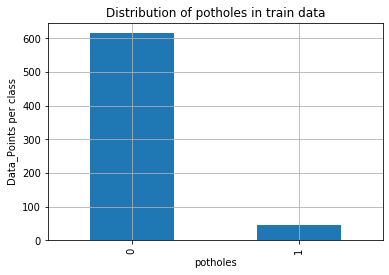

Number of data points in class 0 : 615 ( 93.04084720121028% )
Number of data points in class 1 : 46 ( 6.959152798789712% )


In [90]:
#Now lets see the distribution of class label in Train ,Test and Cross validate
Train_distribution = ((y_train.value_counts())).sort_index()
Train_distribution.plot(kind = 'bar')
plt.title('Distribution of potholes in train data')
plt.xlabel("potholes")
plt.ylabel("Data_Points per class")
plt.grid()
#print (Train_distribution)
plt.show()
for i in Train_distribution.sort_values(ascending=False).iteritems():
    percentage = (Train_distribution.loc[i[0]]/(y_train.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",Train_distribution.loc[i[0]],"(",(percent),")")


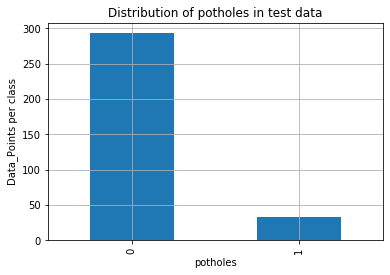

Number of data points in class 0 : 293 ( 89.87730061349694% )
Number of data points in class 1 : 33 ( 10.122699386503067% )


In [91]:
Test_distribution = ((y_test.value_counts())).sort_index()
Test_distribution.plot(kind = 'bar')
plt.title('Distribution of potholes in test data')
plt.xlabel("potholes")
plt.ylabel("Data_Points per class")
plt.grid()

plt.show()
for i in Test_distribution.sort_values(ascending=False).iteritems():
    percentage = (Test_distribution.loc[i[0]]/(y_test.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",Test_distribution.loc[i[0]],"(",(percent),")")


In [104]:
def conf_matrix(y_test,predicted_y):
    labels = ["false","true"]
    A = confusion_matrix(y_test,predicted_y)
    B = (((A.T)/(A.sum(axis=1))).T)
    C =(A/A.sum(axis=0))
    print ("#"*25,"Confusion_Matrix","#"*25)
    plt.figure(figsize=(4,4))
    sns.heatmap(A,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Precision","#"*25)
    plt.figure(figsize=(4,4))
    sns.heatmap(B,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Recall","#"*25)
    plt.figure(figsize=(4,4))
    sns.heatmap(C,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()

<h3> K Nearest Neighbor(KNN) </h3>

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'accuracy')

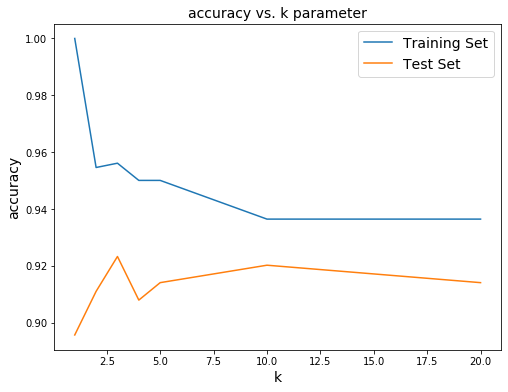

In [94]:
neighbors = [1,2,3,4,5,10,20]
cross_val_accuracy = []
trainaccuracy = []
testaccuracy = []
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(classifier,X_train,y_train,cv = 5)
    cross_val_accuracy.append(np.mean(scores))
    classifier.fit(X_train,y_train)
    train_fit_y = classifier.predict(X_train)
    test_predict_y = classifier.predict(X_test)
    trainaccuracy.append(np.mean(train_fit_y==y_train))
    testaccuracy.append(np.mean(test_predict_y==y_test))
    
    
plt.figure(figsize=(8,6))
plt.plot(neighbors, trainaccuracy, label="Training Set")
plt.plot(neighbors, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('accuracy vs. k parameter', fontsize=14)
plt.xlabel('k', fontsize=14)
plt.ylabel('accuracy', fontsize=14)



In [98]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9141104294478528

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       293
           1       0.63      0.36      0.46        33

    accuracy                           0.91       326
   macro avg       0.78      0.67      0.71       326
weighted avg       0.90      0.91      0.90       326


Confusion matrix:


array([[286,   7],
       [ 21,  12]])

######################### Confusion_Matrix #########################


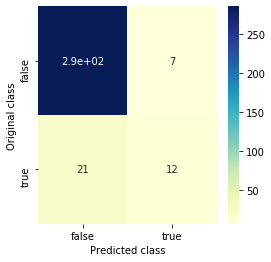

######################### Precision #########################


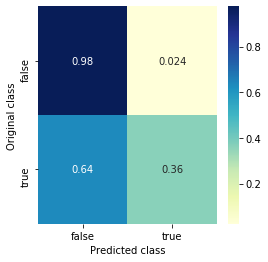

######################### Recall #########################


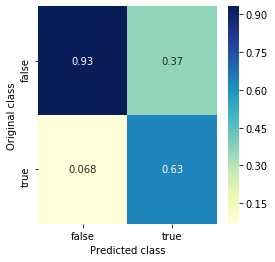

In [105]:
conf_matrix(y_test,y_pred)

<h3> Logistic Regression </h3>

Text(0, 0.5, 'accuracy')

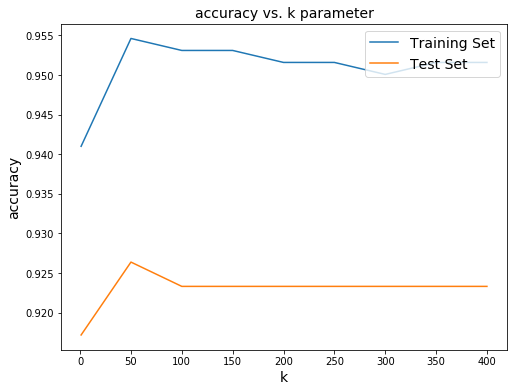

In [107]:
from sklearn.linear_model import LogisticRegression
C = [1, 50, 100, 150, 200, 250, 300, 350, 400]
cross_val_accuracy = []
trainaccuracy = []
testaccuracy = []
for c in C:
    classifier = LogisticRegression(C=c)
    scores = cross_val_score(classifier,X_train,y_train,cv = 5)
    cross_val_accuracy.append(np.mean(scores))
    classifier.fit(X_train,y_train)
    train_fit_y = classifier.predict(X_train)
    test_predict_y = classifier.predict(X_test)
    trainaccuracy.append(np.mean(train_fit_y==y_train))
    testaccuracy.append(np.mean(test_predict_y==y_test))
    
    
plt.figure(figsize=(8,6))
plt.plot(C, trainaccuracy, label="Training Set")
plt.plot(C, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('accuracy vs. k parameter', fontsize=14)
plt.xlabel('k', fontsize=14)
plt.ylabel('accuracy', fontsize=14)



In [108]:
clf = LogisticRegression(C=50)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9263803680981595

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       293
           1       0.74      0.42      0.54        33

    accuracy                           0.93       326
   macro avg       0.84      0.70      0.75       326
weighted avg       0.92      0.93      0.92       326


Confusion matrix:


array([[288,   5],
       [ 19,  14]])

######################### Confusion_Matrix #########################


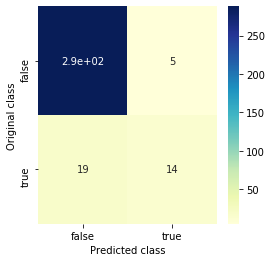

######################### Precision #########################


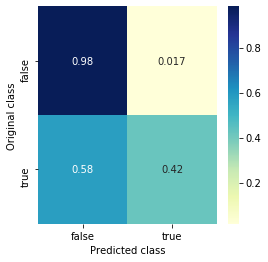

######################### Recall #########################


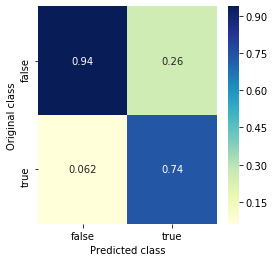

In [109]:
conf_matrix(y_test,y_pred)

<h3> Support Vector Machine </h3>

Text(0, 0.5, 'accuracy')

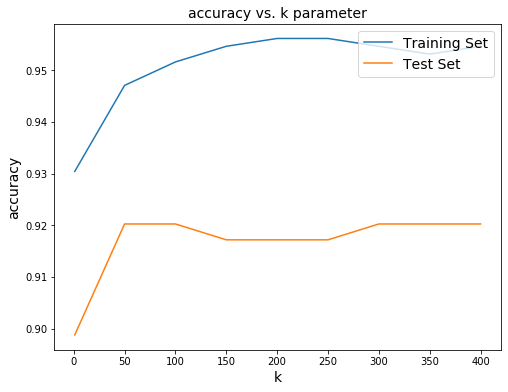

In [111]:
from sklearn.svm import SVC

C = [1, 50, 100, 150, 200, 250, 300, 350, 400]
cross_val_accuracy = []
trainaccuracy = []
testaccuracy = []
for c in C:
    classifier = SVC(C=c)
    scores = cross_val_score(classifier,X_train,y_train,cv = 5)
    cross_val_accuracy.append(np.mean(scores))
    classifier.fit(X_train,y_train)
    train_fit_y = classifier.predict(X_train)
    test_predict_y = classifier.predict(X_test)
    trainaccuracy.append(np.mean(train_fit_y==y_train))
    testaccuracy.append(np.mean(test_predict_y==y_test))
    
    
plt.figure(figsize=(8,6))
plt.plot(C, trainaccuracy, label="Training Set")
plt.plot(C, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('accuracy vs. k parameter', fontsize=14)
plt.xlabel('k', fontsize=14)
plt.ylabel('accuracy', fontsize=14)



In [112]:
clf = SVC(C=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9202453987730062

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       293
           1       0.71      0.36      0.48        33

    accuracy                           0.92       326
   macro avg       0.82      0.67      0.72       326
weighted avg       0.91      0.92      0.91       326


Confusion matrix:


array([[288,   5],
       [ 21,  12]])

######################### Confusion_Matrix #########################


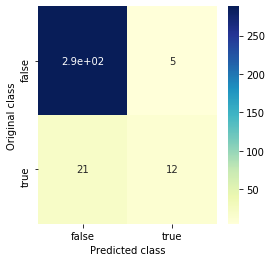

######################### Precision #########################


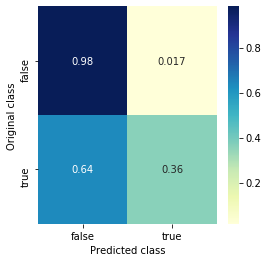

######################### Recall #########################


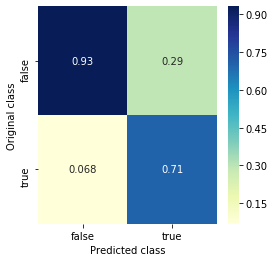

In [113]:
conf_matrix(y_test,y_pred)

<h3> Random Forest Classifier </h3>

Text(0, 0.5, 'accuracy')

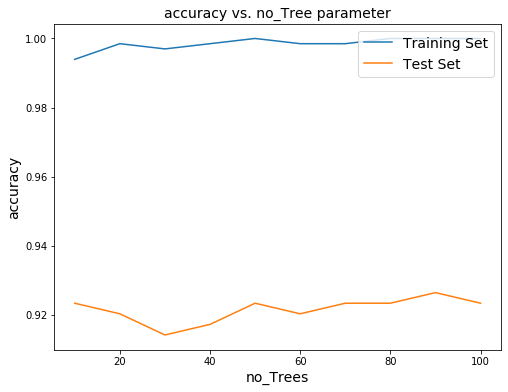

In [116]:
from sklearn.ensemble import RandomForestClassifier
no_Trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cross_val_accuracy = []
trainaccuracy = []
testaccuracy = []
for n in no_Trees:
    classifier = RandomForestClassifier(n_estimators=n, random_state=0)
    scores = cross_val_score(classifier,X_train,y_train,cv = 5)
    cross_val_accuracy.append(np.mean(scores))
    classifier.fit(X_train,y_train)
    train_fit_y = classifier.predict(X_train)
    test_predict_y = classifier.predict(X_test)
    trainaccuracy.append(np.mean(train_fit_y==y_train))
    testaccuracy.append(np.mean(test_predict_y==y_test))
    
    
plt.figure(figsize=(8,6))
plt.plot(no_Trees, trainaccuracy, label="Training Set")
plt.plot(no_Trees, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('accuracy vs. no_Tree parameter', fontsize=14)
plt.xlabel('no_Trees', fontsize=14)
plt.ylabel('accuracy', fontsize=14)


In [118]:
# Final Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9233128834355828

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       293
           1       0.72      0.39      0.51        33

    accuracy                           0.92       326
   macro avg       0.83      0.69      0.73       326
weighted avg       0.91      0.92      0.91       326


Confusion matrix:


array([[288,   5],
       [ 20,  13]])

######################### Confusion_Matrix #########################


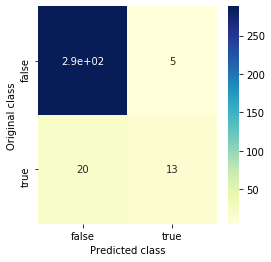

######################### Precision #########################


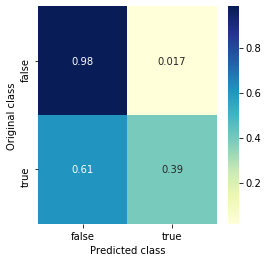

######################### Recall #########################


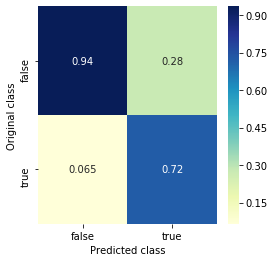

In [119]:
conf_matrix(y_test,y_pred)

<h3> Gradient Boosting </h3>

Text(0, 0.5, 'Accuracy')

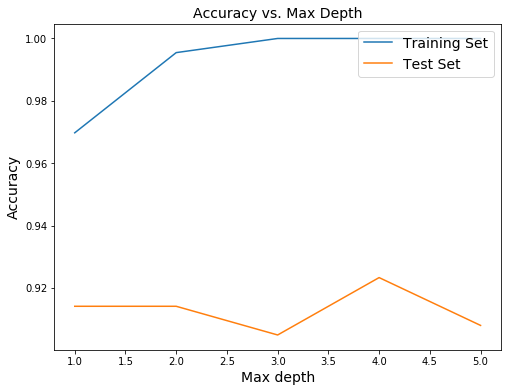

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
depths = [1, 2, 3, 4, 5]
cvAccuracy = []
trainaccuracy = []
testaccuracy = []

for d in depths:
    clf = GradientBoostingClassifier(max_depth=d, random_state=0)
    scores = cross_val_score(clf, X_train,y_train, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainaccuracy.append(np.mean(y_fitted==y_train))
    testaccuracy.append(np.mean(y_pred==y_test))

plt.figure(figsize=(8,6))
plt.plot(depths, trainaccuracy, label="Training Set")
plt.plot(depths, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Accuracy vs. Max Depth', fontsize=14)
plt.xlabel('Max depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

In [129]:
clf = GradientBoostingClassifier(max_depth=4, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9233128834355828

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       293
           1       0.68      0.45      0.55        33

    accuracy                           0.92       326
   macro avg       0.81      0.72      0.75       326
weighted avg       0.91      0.92      0.92       326


Confusion matrix:


array([[286,   7],
       [ 18,  15]])

######################### Confusion_Matrix #########################


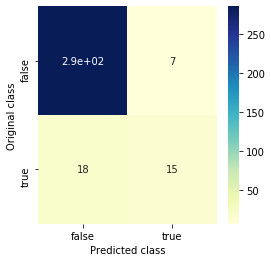

######################### Precision #########################


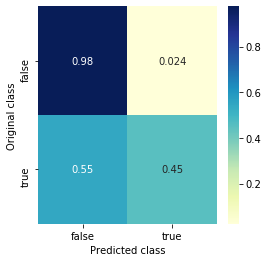

######################### Recall #########################


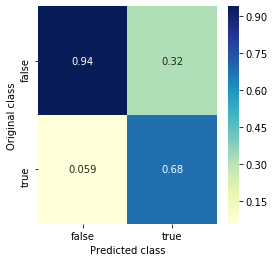

In [130]:
conf_matrix(y_test,y_pred)